In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.tree import DecisionTreeClassifier
df=pd.read_csv('TOMATO.csv')
df


,Unnamed: 0,contrast,homogenity,energy,correlation,Dissimilarity,class
0,0,1160.444606,820.425896,699.728694,313.439607,409.228061,4
1,1,0.068656,0.080788,0.065882,0.084992,0.090245,4
2,2,0.011355,0.014058,0.016119,0.014343,0.013725,4
3,3,0.669000,0.793019,0.625130,0.847330,0.768395,2
4,4,22.250698,19.205301,18.459183,13.097645,14.384355,4
...,...,...,...,...,...,...,...
16665,16665,1122.549491,0.059239,0.010383,0.686828,22.414665,9
16666,16666,504.967023,0.072884,0.019410,0.595898,15.556679,9
16667,16667,618.657722,0.134013,0.029314,0.878175,16.140956,9
16668,16668,1231.090166,0.077953,0.013646,0.764855,22.069951,9


In [3]:
df.head()

,Unnamed: 0,contrast,homogenity,energy,correlation,Dissimilarity,class
0,0,1160.444606,820.425896,699.728694,313.439607,409.228061,4
1,1,0.068656,0.080788,0.065882,0.084992,0.090245,4
2,2,0.011355,0.014058,0.016119,0.014343,0.013725,4
3,3,0.669000,0.793019,0.625130,0.847330,0.768395,2
4,4,22.250698,19.205301,18.459183,13.097645,14.384355,4


In [4]:
x=df.drop('class',axis=1)
y=df['class']
print("shape of x",x.shape)
print("shape of y",y.shape)

shape of x (16670, 6)
shape of y (16670,)


In [5]:
from sklearn .model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [6]:
x_train

,Unnamed: 0,contrast,homogenity,energy,correlation,Dissimilarity
10586,10586,504.692274,0.111752,0.016640,0.745043,13.407677
12341,12341,1248.322096,0.063316,0.010362,0.746056,23.820236
13965,13965,1014.978351,0.056764,0.010441,0.671167,22.847697
887,887,545.031026,0.085778,0.011631,0.847641,15.975380
4159,4159,360.619598,0.061630,0.010843,0.893797,15.113539
...,...,...,...,...,...,...
9225,9225,357.733156,0.085129,0.017927,0.706734,13.094571
13123,13123,843.504967,0.061336,0.016191,0.553372,20.244278
9845,9845,2013.299885,0.043457,0.008880,0.492119,33.323665
10799,10799,2104.063015,0.041180,0.008632,0.467391,33.084418


In [7]:
y_train

10586    8
12341    5
13965    5
887      2
4159     0
        ..
9225     3
13123    7
9845     3
10799    3
2732     0
Name: class, Length: 12502, dtype: int64

In [8]:
print("Training data",x_train)
print("Testing data",x_test)
print("Training data",y_train)
print("Testing data",y_test)

Training data        Unnamed: 0     contrast  homogenity    energy  correlation  \
10586       10586   504.692274    0.111752  0.016640     0.745043   
12341       12341  1248.322096    0.063316  0.010362     0.746056   
13965       13965  1014.978351    0.056764  0.010441     0.671167   
887           887   545.031026    0.085778  0.011631     0.847641   
4159         4159   360.619598    0.061630  0.010843     0.893797   
...           ...          ...         ...       ...          ...   
9225         9225   357.733156    0.085129  0.017927     0.706734   
13123       13123   843.504967    0.061336  0.016191     0.553372   
9845         9845  2013.299885    0.043457  0.008880     0.492119   
10799       10799  2104.063015    0.041180  0.008632     0.467391   
2732         2732   150.978280    0.153523  0.025610     0.811360   

       Dissimilarity  
10586      13.407677  
12341      23.820236  
13965      22.847697  
887        15.975380  
4159       15.113539  
...              ..

In [9]:
classifier=DecisionTreeClassifier()
classifier.fit(x_train, y_train)

DecisionTreeClassifier()

In [11]:
y_pred=classifier.predict(x_test)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[758   3   0   0   2   0   0   0   0   0]
 [  2 513   0   0   0   0   1   0   0   0]
 [  0   0 243   0   2   0   0   0   0   0]
 [  0   1   0 411   0   0   3   0   4   0]
 [  1   0   2   0 232   0   0   0   0   0]
 [  0   0   0   0   0 423   0   6   3   0]
 [  0   2   0   3   0   0 358   0   0   0]
 [  0   0   0   0   0   2   0 252   0   5]
 [  0   0   0   4   0   4   0   0 475   0]
 [  0   0   0   0   0   2   0   2   0 449]]


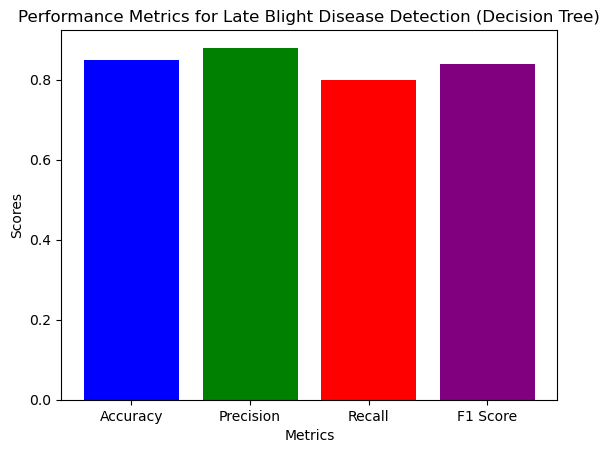

In [13]:
import matplotlib.pyplot as plt

# Example evaluation results (replace with your actual results)
accuracy = 0.85
precision = 0.88
recall = 0.80
f1_score = 0.84

# Labels for the evaluation metrics
labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

# Corresponding values for the evaluation metrics
values = [accuracy, precision, recall, f1_score]

# Create a barplot
plt.bar(labels, values, color=['blue', 'green', 'red', 'purple'])

# Add labels and a title
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Performance Metrics for Late Blight Disease Detection (Decision Tree)')

# Display the barplot
plt.show()

In [14]:
y_pred=classifier.predict(x_test)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))



[[758   3   0   0   2   0   0   0   0   0]
 [  2 513   0   0   0   0   1   0   0   0]
 [  0   0 243   0   2   0   0   0   0   0]
 [  0   1   0 411   0   0   3   0   4   0]
 [  1   0   2   0 232   0   0   0   0   0]
 [  0   0   0   0   0 423   0   6   3   0]
 [  0   2   0   3   0   0 358   0   0   0]
 [  0   0   0   0   0   2   0 252   0   5]
 [  0   0   0   4   0   4   0   0 475   0]
 [  0   0   0   0   0   2   0   2   0 449]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       763
           1       0.99      0.99      0.99       516
           2       0.99      0.99      0.99       245
           3       0.98      0.98      0.98       419
           4       0.98      0.99      0.99       235
           5       0.98      0.98      0.98       432
           6       0.99      0.99      0.99       363
           7       0.97      0.97      0.97       259
           8       0.99      0.98      0.98       483
           9       0.99     